# Evaluate Exercises

Do you work for this exercise in either a jupyter notebook named evaluate within the regression directory. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within the regression directory.

In [1]:
import pandas as pd 
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from pydataset import data

## 1. Load the tips dataset from either pydataset or seaborn.

In [2]:
tips = data("tips")
df = tips[["tip", "total_bill"]]
df.columns = ["y", "x"]

## 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

`from statsmodels.formula.api import ols

model = ols('y ~ x', data=df).fit()
predictions = model.predict(df.x) `

In [3]:
df["yhat_baseline"] = df["y"].mean()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [4]:
from statsmodels.formula.api import ols

model = ols('y ~ x', data=df).fit()
predictions = model.predict(df.x)

In [5]:
df["yhat"] = predictions
df.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,y,x,yhat_baseline,yhat
1,1.01,16.99,2.998279,2.704636
2,1.66,10.34,2.998279,2.006223
3,3.50,21.01,2.998279,3.126835
4,3.31,23.68,2.998279,3.407250
5,3.61,24.59,2.998279,3.502822


## 3. Plot the residuals for the linear regression model that you made.

In [6]:
df["residual"] = df["yhat"] - df["y"]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


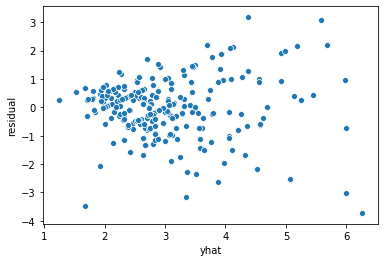

In [7]:
sns.scatterplot(x="yhat", y="residual", data=df)

## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [8]:
# SSE

SSE = mean_squared_error(df.y, df.yhat) * len(df)

# ESS

ESS = sum((df.yhat - df.y.mean())**2)

# TSS

TSS = ESS + SSE

# MSE

MSE = mean_squared_error(df.y, df.yhat)

# RMSE

RMSE = sqrt(mean_squared_error(df.y, df.yhat))


print(f"SSE = {SSE}")
print(f"TSS = {TSS}")
print(f"MSE = {MSE}")
print(f"RMSE = {RMSE}")

SSE = 252.788743850776
TSS = 465.21247704918017
MSE = 1.036019442011377
RMSE = 1.0178504025697377


## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [9]:
# SSE

SSE_bs = mean_squared_error(df.y, df.yhat_baseline) * len(df)

# TSS

ESS_bs = mean_squared_error(df.y, df.yhat_baseline) * len(df)

TSS_bs = ESS_bs + SSE_bs

# MSE

MSE_bs = mean_squared_error(df.y, df.yhat_baseline)

# RMSE

RMSE_bs = sqrt(mean_squared_error(df.y, df.yhat_baseline))


print(f"SSE = {SSE_bs}")
print(f"TSS = {TSS_bs}")
print(f"MSE = {MSE_bs}")
print(f"RMSE = {RMSE_bs}")

SSE = 465.2124770491804
TSS = 930.4249540983608
MSE = 1.906608512496641
RMSE = 1.3807999538298954


## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [10]:
if SSE < SSE_bs:
    print("The model performs better than the baseline model")
else:
    print("The model does not perform better than the baseline model")

The model performs better than the baseline model


## 7. What is the amount of variance explained in your model?

The variance is equal to $R^2$ and basically explaines the variance between the relationship

In [11]:
evs = explained_variance_score(df.y, df.yhat)
print("Explained Variance = ", round(evs,3))

Explained Variance =  0.457


In [12]:
model.rsquared

0.45661658635167646

## 8. Is your model significantly better than the baseline model? 

In [13]:
print(model.f_pvalue)

6.692470646863376e-34


Becasue our p value is smaller than our alpha, we can say that our model is significantly better than the baseline model

## 9. Create a file named evaluate.py that contains the following functions.

plot_residuals(y, yhat): creates a residual plot
regression_errors(y, yhat): returns the following values:
sum of squared errors (SSE)
explained sum of squares (ESS)
total sum of squares (TSS)
mean squared error (MSE)
root mean squared error (RMSE)
baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
model_significance(ols_model): that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether your model is significantly better than the baseline model (Hint: use the rsquared and f_pvalue properties from the ols model)

In [14]:
df

,y,x,yhat_baseline,yhat,residual
1,1.01,16.99,2.998279,2.704636,1.694636
2,1.66,10.34,2.998279,2.006223,0.346223
3,3.50,21.01,2.998279,3.126835,-0.373165
4,3.31,23.68,2.998279,3.407250,0.097250
5,3.61,24.59,2.998279,3.502822,-0.107178
...,...,...,...,...,...
240,5.92,29.03,2.998279,3.969131,-1.950869
241,2.00,27.18,2.998279,3.774836,1.774836
242,2.00,22.67,2.998279,3.301175,1.301175
243,1.75,17.82,2.998279,2.791807,1.041807


In [15]:
def baseline_mean_errors(df):
    df["yhat_baseline"] = df["y"].mean()
    # SSE
    SSE_bl = mean_squared_error(df.y, df.yhat_baseline) * len(df)
    # ESS
    ESS_bl = mean_squared_error(df.y, df.yhat_baseline) * len(df)
    # TSS
    TSS_bl = ESS_bl + SSE_bl
    # MSE
    MSE_bl = mean_squared_error(df.y, df.yhat_baseline)
    # RMSE
    RMSE_bl = sqrt(mean_squared_error(df.y, df.yhat_baseline))
    ss_bl = pd.DataFrame(np.array(["SSE_Baseline", "ESS_Baseline", "TSS_Baseline", "MSE_Baseline", "RMSE_Baseline"]), columns=["metric"])
    ss_bl["model_values"] = np.array([SSE_bl, ESS_bl, TSS_bl, MSE_bl, RMSE_bl])
    return ss_bl

In [16]:
df["y"]

1      1.01
2      1.66
3      3.50
4      3.31
5      3.61
       ... 
240    5.92
241    2.00
242    2.00
243    1.75
244    3.00
Name: y, Length: 244, dtype: float64

In [17]:
baseline_mean_errors(df)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,metric,model_values
0,SSE_Baseline,465.212477
1,ESS_Baseline,465.212477
2,TSS_Baseline,930.424954
3,MSE_Baseline,1.906609
4,RMSE_Baseline,1.380800


In [18]:
def regression_errors(df):
    # SSE
    SSE = mean_squared_error(df.y, df.yhat) * len(df)
    # ESS
    ESS = sum((df.yhat - df.y.mean())**2)
    # TSS
    TSS = ESS + SSE
    # MSE
    MSE = mean_squared_error(df.y, df.yhat)
    # RMSE
    RMSE = sqrt(mean_squared_error(df.y, df.yhat))
    ss = pd.DataFrame(np.array(["SSE", "ESS", "TSS", "MSE", "RMSE"]), columns=["metric"])
    ss["model_values"] = np.array([SSE, ESS, TSS, MSE, RMSE])
    return ss

In [19]:
regression_errors(df)

,metric,model_values
0,SSE,252.788744
1,ESS,212.423733
2,TSS,465.212477
3,MSE,1.036019
4,RMSE,1.017850


In [20]:
def evaluation_example5(df, x, y):
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='dimgray')

    # add the residual line at y=0
    plt.annotate('', xy=(70, 0), xytext=(100, 0), xycoords='data', textcoords='data', arrowprops={'arrowstyle': '-', 'color': 'darkseagreen'})

    # set titles
    plt.title(r'Baseline Residuals', fontsize=12, color='black')
    # add axes labels
    plt.ylabel(r'$\hat{y}-y$')
    plt.xlabel('var $x$')

    # add text
    plt.text(85, 15, r'', ha='left', va='center', color='black')

    return plt.show()

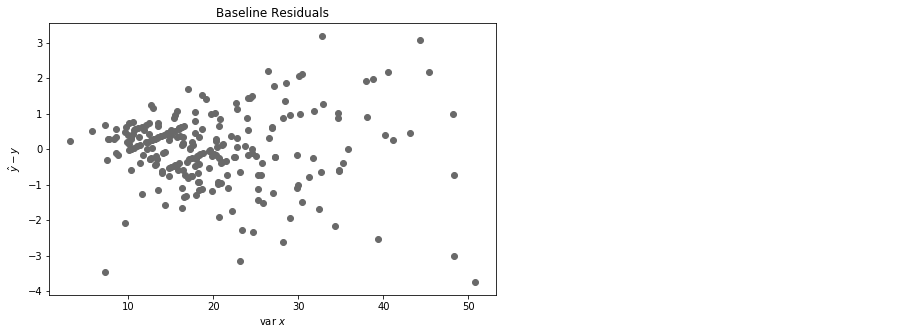

In [21]:
evaluation_example5(df, df["x"], df["residual"])

## 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [22]:
import explore
import evaluate

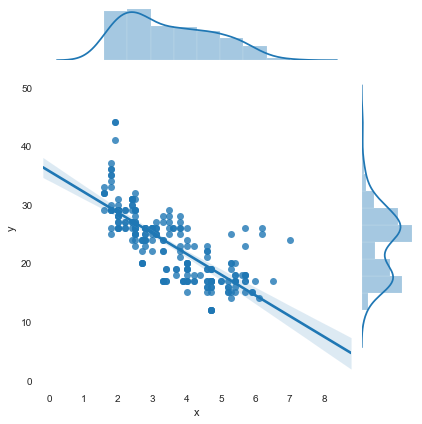

In [23]:
mpg = data("mpg")
df = mpg[["hwy", "displ"]]
df.columns = ["y", "x"]
explore.create_jointplot(df, df.y, df.x)

In [24]:
df["yhat_baseline"] = df["y"].mean()

In [25]:
from statsmodels.formula.api import ols

# generate parameters, i.e. create model
ols_model = ols('y ~ x', data = df).fit()

# compute predictions and add to original dataframe
df['yhat'] = ols_model.predict(df.x)

In [26]:
evaluate.regression_errors(df)

,metric,model_values
0,SSE,3413.829009
1,ESS,4847.833384
2,TSS,8261.662393
3,MSE,14.589013
4,RMSE,3.819557


In [27]:
evaluate.baseline_mean_errors(df)

,metric,model_values
0,SSE_Baseline,8261.662393
1,ESS_Baseline,8261.662393
2,TSS_Baseline,16523.324786
3,MSE_Baseline,35.306250
4,RMSE_Baseline,5.941906


In [30]:
evaluate.mean_errors_delta(df)

,metric,model_values,delta
0,SSE,3413.829009,-4847.833384
1,ESS,4847.833384,-3413.829009
2,TSS,8261.662393,-8261.662393
3,MSE,14.589013,-20.717237
4,RMSE,3.819557,-2.122350


In [28]:
evaluate.better_than_baseline(df)

True

In [29]:
R, p = evaluate.model_significance(ols_model)

R, p

(0.5867866723989039, 2.0389744555910457e-46)

For this case, we can conclude that our model is better than the baseline, our RMSE is smaller than the baseline's, and the p-value is smaller than our alpha, so we can say with confidence that our model is significantly better than the baseline. The R (or variance) is also above .4 which we can consider as a strong correlation. 